# DIC Phase 2
## Prof. Eric Mikida
### Yashika Nihalani, 50425015
### Ashutosh Shailesh Bhawsar, 50416025

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import time

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import date

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import activation

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
btc_main = pd.read_csv('/content/drive/MyDrive/DIC Project/bitcoin_daily_data_cleaned.csv', index_col='Timestamp')

btc_data = btc_main[['Weighted_Price']]
btc_data['Weighted_Price'].fillna(method='ffill', inplace=True)
btc_data

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Weighted_Price
Timestamp,
2011-12-31,4.47
2012-01-01,4.81
2012-01-02,5.00
2012-01-03,5.25
2012-01-04,5.21
...,...
2021-03-27,55193.36
2021-03-28,55832.96
2021-03-29,56913.99


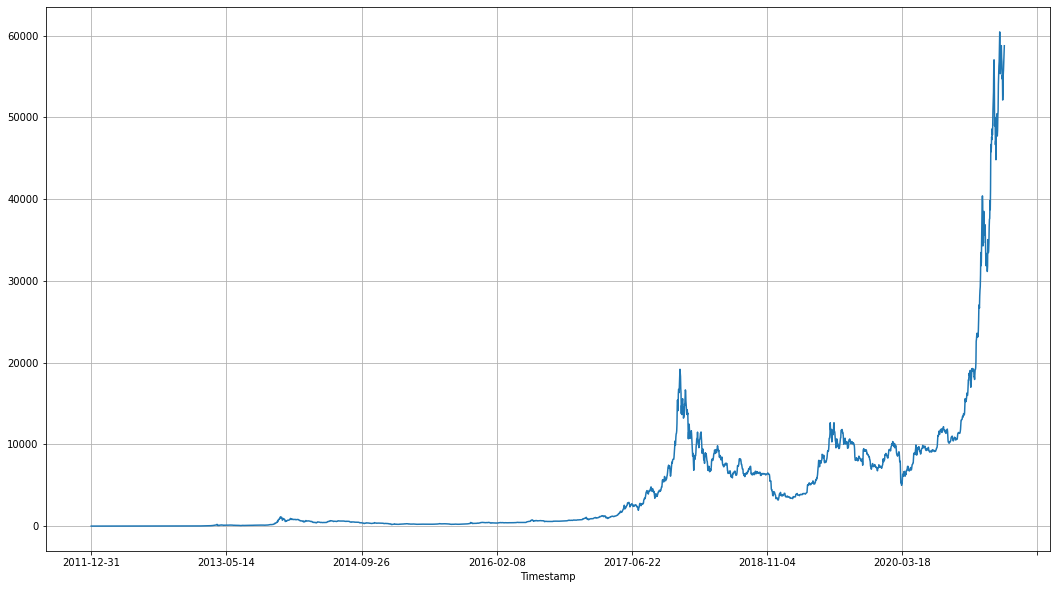

In [4]:
btc_data['Weighted_Price'].plot(figsize = (18, 10), grid = True)

# **Algorithms and their Visualizations**

##### **1) Linear Regression**

In [5]:
linear_time_unix=pd.DataFrame({})

In [6]:
linear_time_unix['Timestamp_Unix']=pd.DatetimeIndex(btc_data.index).astype(np.int64)/1000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [7]:
data_x = linear_time_unix[['Timestamp_Unix']]
data_y = btc_data['Weighted_Price']

In [8]:
train_x, test_x, train_y, test_y=train_test_split(data_x, data_y)

In [9]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(train_x, train_y)

LinearRegression()

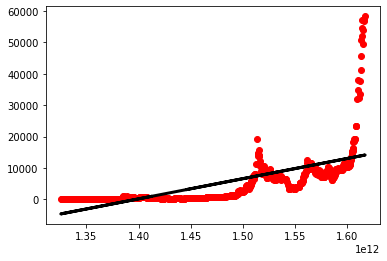

In [10]:
plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, linear_regression_model.predict(test_x), color='black',linewidth=3)

##### **2) KNN Classifier**

In [11]:

df1=pd.DataFrame(btc_main,columns=['Open','Close','Volume_BTC', 'Volume_Currency', 'Weighted_Price'])
df1=df1.dropna()
df1

,Open,Close,Volume_BTC,Volume_Currency,Weighted_Price
Timestamp,,,,,
2011-12-31,4.39,4.58,23.83,106.33,4.47
2012-01-01,4.58,5.00,7.20,35.26,4.81
2012-01-02,5.00,5.00,19.05,95.24,5.00
2012-01-03,5.32,5.29,11.00,58.10,5.25
2012-01-04,4.93,5.57,11.91,63.12,5.21
...,...,...,...,...,...
2021-03-27,55081.26,55839.42,1.82,100884.73,55193.36
2021-03-28,55817.85,55790.92,1.45,80632.12,55832.96
2021-03-29,55790.28,57600.10,3.73,213754.56,56913.99


In [12]:
X=df1.drop(['Weighted_Price'],axis=1)
Y=df1['Weighted_Price']
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)


In [13]:
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

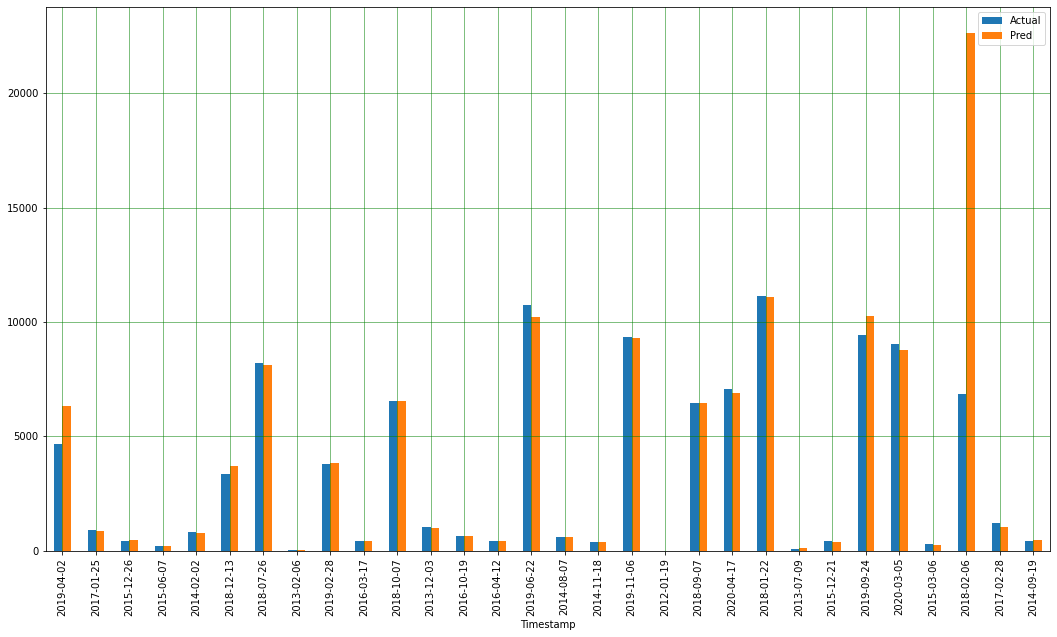

In [14]:
plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.tail(30).plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##### **3) Random Forest Regressor**

In [15]:
random_forest_frame=btc_main
random_forest_frame["Diff"] = random_forest_frame.Close.diff()
random_forest_frame["Force_Index"] = random_forest_frame["Close"] * random_forest_frame["Volume_BTC"]
random_forest_frame["y"]=random_forest_frame['Trade_signal']

In [16]:
random_forest_frame=random_forest_frame[['SMA10', 'Force_Index', 'y']].copy().dropna()

In [17]:
random_forest_frame.columns

Index(['SMA10', 'Force_Index', 'y'], dtype='object')

In [18]:
random_forest_frame

,SMA10,Force_Index,y
Timestamp,,,
2012-01-09,5.819,11.7180,0.0
2012-01-10,6.075,14.8512,0.0
2012-01-11,6.275,15.3300,0.0
2012-01-12,6.426,44.6586,0.0
2012-01-13,6.557,10.0980,0.0
...,...,...,...
2021-03-27,55420.714,101627.7444,1.0
2021-03-28,55235.001,80896.8340,1.0
2021-03-29,55187.811,214848.3730,1.0


In [19]:
X = random_forest_frame.drop(["y"], axis=1).values
y = random_forest_frame["y"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,shuffle=False)

In [20]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train,)

RandomForestClassifier()

In [21]:
y_pred = random_forest_classifier.predict(X_test)
print("Accuracy for RFC: ",accuracy_score(y_test, y_pred)*100,"%")

Accuracy for RFC:  65.27777777777779 %


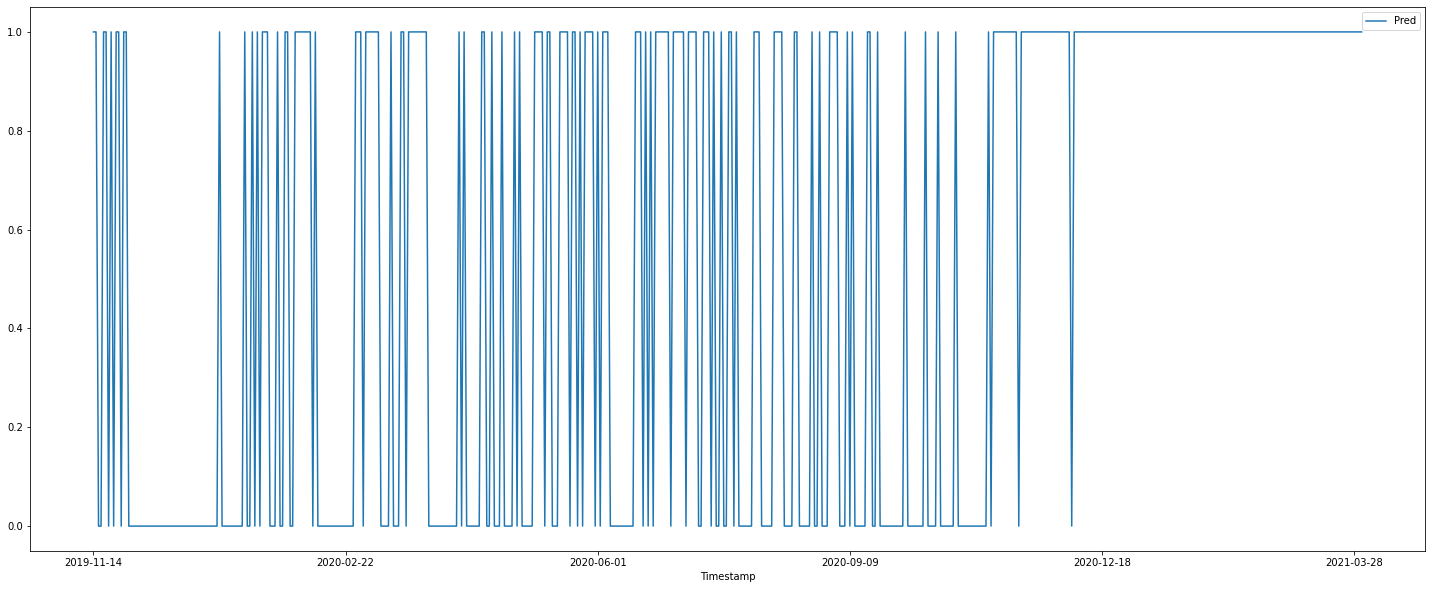

In [22]:
predictions=pd.DataFrame(y_pred)
predictions.columns=['Pred']
predictions.index=random_forest_frame[int(len(random_forest_frame)*0.85):].index
predictions.plot(figsize=(25,10))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


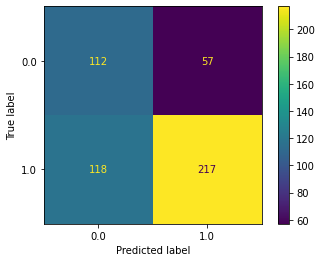

In [23]:
plot_confusion_matrix(random_forest_classifier, X_test, y_test) 

##### **4) Long Short Term Memory (LSTM)**

In [24]:
# Splitting the dataset
splitting_index = int(0.85*len(btc_data))
df_train = btc_data.iloc[:splitting_index,:]
df_test = btc_data.iloc[splitting_index:,:]

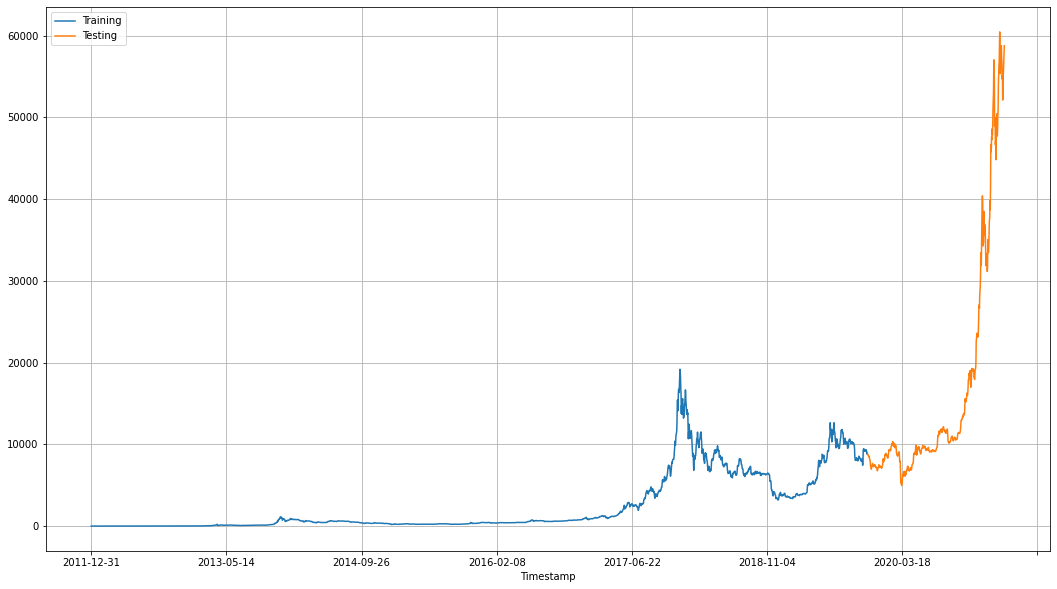

In [25]:
# Visualize Training and Testing data
visualize_frame=pd.DataFrame({})
visualize_frame.index=btc_data.index
visualize_frame['Training']=df_train['Weighted_Price']
visualize_frame['Testing']=df_test['Weighted_Price']
visualize_frame.plot(grid=True, figsize=(18,10))

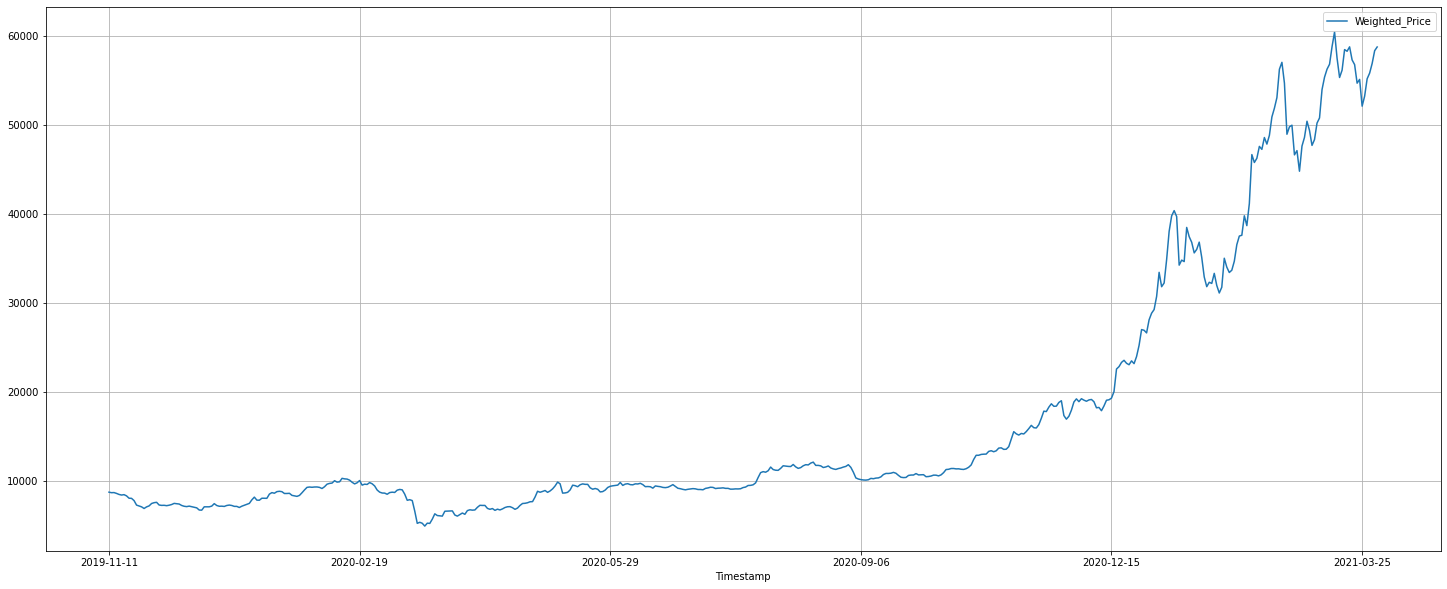

In [26]:
df_test.plot(grid=True, figsize=(25,10))

In [27]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [28]:

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 128, activation = 'sigmoid', input_shape = (1, 1)))

regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.summary()

# Fitting the RNN to the Training set
model_history = regressor.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
58/58 - 2s - loss: 0.0788 - 2s/epoch - 35ms/step
Epoch 2/100
58/58 - 0s - loss: 0.0585 - 216ms/epoch - 4ms/step
Epoch 3/100
58/58 - 0s - loss: 0.0516 - 226ms/epoch - 4ms/step
Epoch 4/100
58/58 - 0s - loss: 0.0441 - 207ms/epoch - 4ms/step
Epoch 5/100
58/58 - 0s - loss: 0.0375 - 230ms/epoch - 4ms/step
Epo

16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


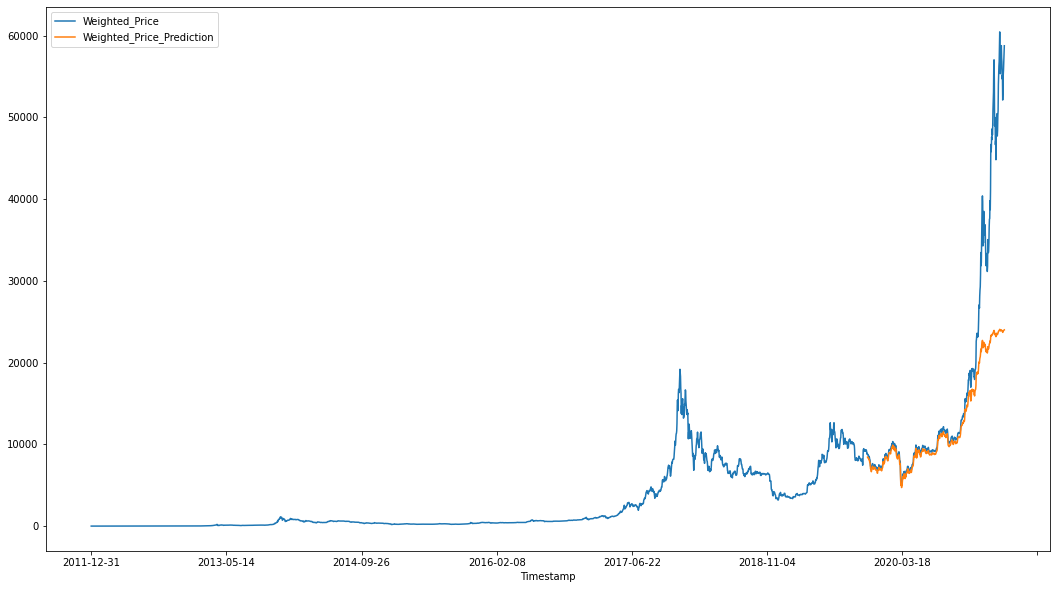

In [29]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
df_test['Weighted_Price_Prediction'] = predicted_BTC_price
data_all = pd.concat([df_train, df_test], sort=False)
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(18, 10))

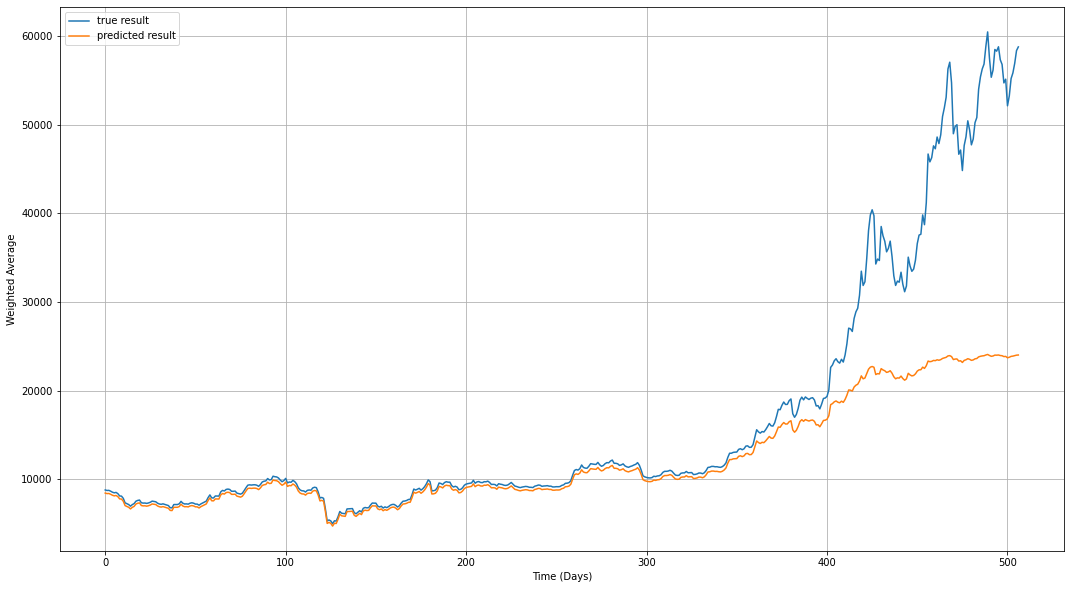

In [30]:
# Visualising the results

plt.figure(figsize=(18,10))
plt.plot(test_set, label="true result")
plt.plot(predicted_BTC_price, label="predicted result")
plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Weighted Average")
plt.grid(True)
plt.show()

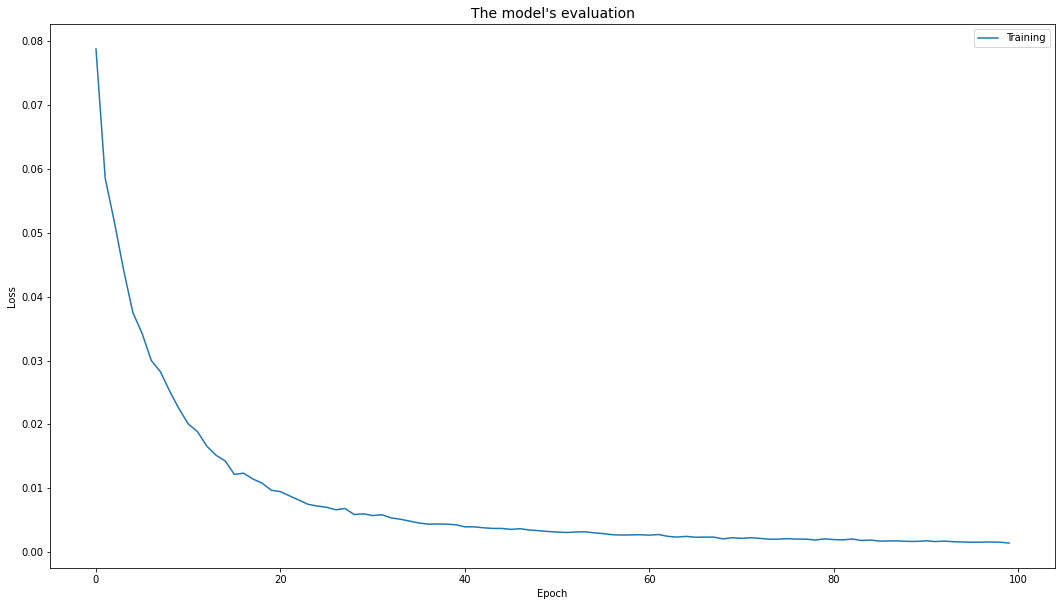

In [31]:
plt.figure(figsize=(18,10))
plt.plot(model_history.history['loss'])
plt.legend(['Training'])
plt.title("The model's evaluation", fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

##### **5) Prophet**

In [32]:
weighted_data=pd.DataFrame({})
weighted_data.index=btc_main.index
weighted_data['Weighted_Price']=btc_main['Weighted_Price']
weighted_data['Weighted_Price'].fillna(method='ffill', inplace=True)
weighted_data

,Weighted_Price
Timestamp,
2011-12-31,4.47
2012-01-01,4.81
2012-01-02,5.00
2012-01-03,5.25
2012-01-04,5.21
...,...
2021-03-27,55193.36
2021-03-28,55832.96
2021-03-29,56913.99


In [33]:
splitting_index = int(0.85*len(btc_data))
df_train = weighted_data.iloc[:splitting_index,:]
df_test = weighted_data.iloc[splitting_index:,:]
df_train=df_train.dropna()
df_test=df_test.dropna()
print(df_train.shape)
print(df_test.shape)

(2872, 1)
(507, 1)


In [34]:
!pip install pystan==2.19
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.2 MB 21 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6271731 sha256=05862ec15b093ff3c591596e6a0511824c6a73b067feb5be2d83892576af3b2e
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the p

In [35]:
import fbprophet
from fbprophet import Prophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [36]:
prophet_data=btc_main.copy()
prophet_data

,Open,Close,High,Low,Volume_BTC,Volume_Currency,Weighted_Price,Change_percentage,SMA10,SMA20,SMA50,Trade_signal,Diff,Force_Index,y
Timestamp,,,,,,,,,,,,,,,
2011-12-31,4.39,4.58,4.58,4.39,23.83,106.33,4.47,NaN,NaN,NaN,NaN,0.0,NaN,109.1414,0.0
2012-01-01,4.58,5.00,5.00,4.58,7.20,35.26,4.81,9.17,NaN,NaN,NaN,0.0,0.42,36.0000,0.0
2012-01-02,5.00,5.00,5.00,5.00,19.05,95.24,5.00,0.00,NaN,NaN,NaN,0.0,0.00,95.2500,0.0
2012-01-03,5.32,5.29,5.32,5.14,11.00,58.10,5.25,5.80,NaN,NaN,NaN,0.0,0.29,58.1900,0.0
2012-01-04,4.93,5.57,5.57,4.93,11.91,63.12,5.21,5.29,NaN,NaN,NaN,0.0,0.28,66.3387,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,55081.26,55839.42,56686.15,53948.35,1.82,100884.73,55193.36,1.38,55420.714,56204.7735,51692.5584,1.0,758.05,101627.7444,1.0
2021-03-28,55817.85,55790.92,56573.04,54677.51,1.45,80632.12,55832.96,-0.09,55235.001,56372.9295,52022.7348,1.0,-48.50,80896.8340,1.0
2021-03-29,55790.28,57600.10,58402.68,54892.42,3.73,213754.56,56913.99,3.24,55187.811,56506.4835,52397.5690,1.0,1809.18,214848.3730,1.0


In [37]:
prophet_data.reset_index(inplace=True)
prophet_data = prophet_data[['Timestamp', 'Weighted_Price']]
prophet_data.columns = ['ds', 'y']

In [38]:
X = prophet_data
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]

In [39]:
model = Prophet()
# fit the model
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = model.make_future_dataframe(periods=len(test))
forecasting = model.predict(future)
# prediction is stored and RMSE is returned
y_true = test['y'].values
y_pred = forecasting.yhat.values[-len(test):]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 16437.500


In [41]:
forecasting

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-12-31,-66.887553,-1394.234147,1700.483095,-66.887553,-66.887553,211.265964,211.265964,211.265964,9.843689,9.843689,9.843689,201.422275,201.422275,201.422275,0.0,0.0,0.0,144.378411
1,2012-01-01,-66.354882,-1432.407727,1708.198870,-66.354882,-66.354882,173.559564,173.559564,173.559564,0.388747,0.388747,0.388747,173.170817,173.170817,173.170817,0.0,0.0,0.0,107.204683
2,2012-01-02,-65.822210,-1448.037603,1660.192805,-65.822210,-65.822210,151.764376,151.764376,151.764376,6.156795,6.156795,6.156795,145.607581,145.607581,145.607581,0.0,0.0,0.0,85.942166
3,2012-01-03,-65.289539,-1426.129637,1647.869626,-65.289539,-65.289539,125.709875,125.709875,125.709875,6.768856,6.768856,6.768856,118.941019,118.941019,118.941019,0.0,0.0,0.0,60.420337
4,2012-01-04,-64.756867,-1482.750776,1552.293643,-64.756867,-64.756867,93.304759,93.304759,93.304759,-0.012928,-0.012928,-0.012928,93.317687,93.317687,93.317687,0.0,0.0,0.0,28.547892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,2021-03-27,8906.804155,298.934781,16519.645551,766.287228,17070.880732,-406.446434,-406.446434,-406.446434,9.843689,9.843689,9.843689,-416.290122,-416.290122,-416.290122,0.0,0.0,0.0,8500.357722
3375,2021-03-28,8909.031002,345.992959,16989.829127,724.742715,17101.522972,-407.081419,-407.081419,-407.081419,0.388747,0.388747,0.388747,-407.470166,-407.470166,-407.470166,0.0,0.0,0.0,8501.949582
3376,2021-03-29,8911.257848,272.218339,16962.940366,710.869446,17132.165212,-390.302571,-390.302571,-390.302571,6.156795,6.156795,6.156795,-396.459366,-396.459366,-396.459366,0.0,0.0,0.0,8520.955277
3377,2021-03-30,8913.484694,140.125364,16834.128509,666.608710,17162.807452,-376.734444,-376.734444,-376.734444,6.768856,6.768856,6.768856,-383.503300,-383.503300,-383.503300,0.0,0.0,0.0,8536.750250


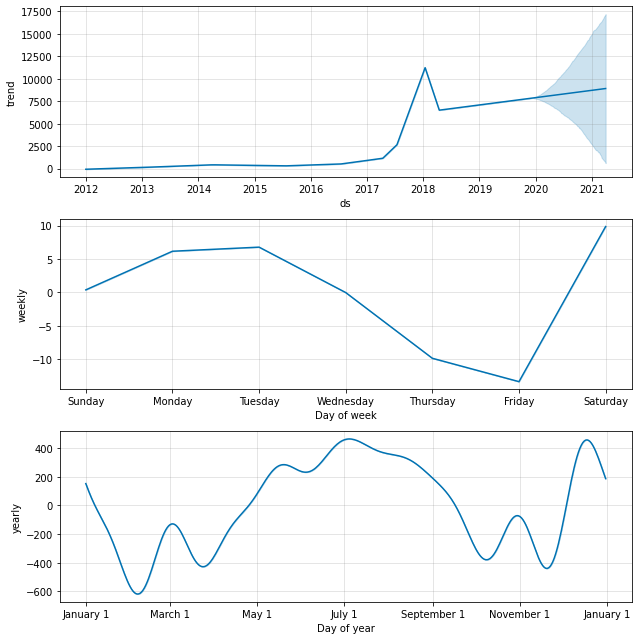

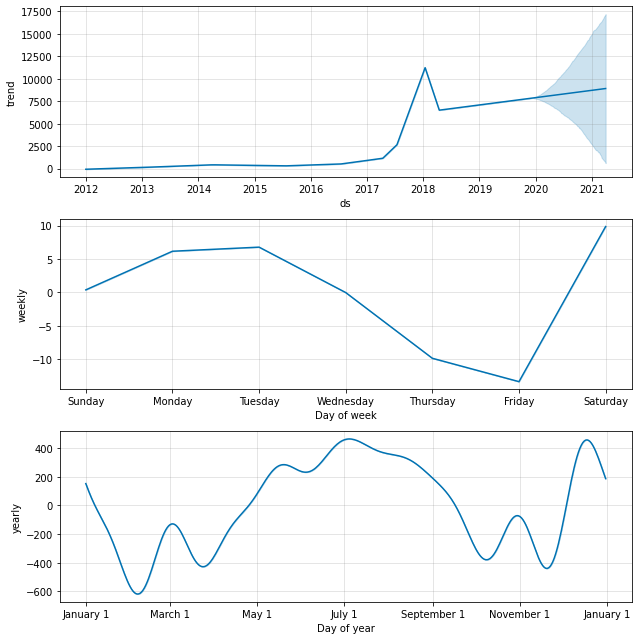

In [42]:
model.plot_components(forecasting)

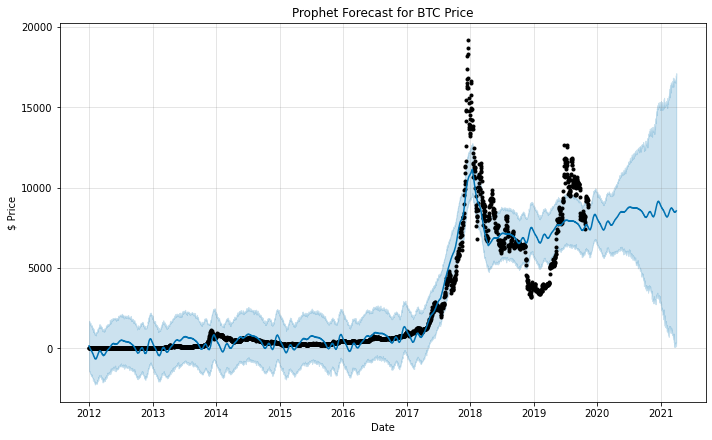

In [43]:
model.plot(forecasting)
plt.title('Prophet Forecast for BTC Price')
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.show()